In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
data = np.loadtxt('F:/machine learning/第1课/regression_based_algorithms/ML-examples/linear_regression/linear_regression_data1.txt',delimiter = ',')
print(data)
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

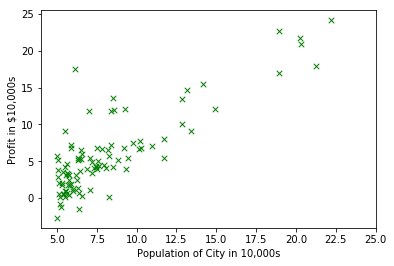

In [3]:
plt.scatter(X[:,1], y, s = 30, c = 'g', marker = 'x', linewidth = 1)
plt.xlim(4,25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:
#计算损失函数
def computeCost(X, y, theta = [[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1.0/(2*m)*(np.sum(np.square(h - y)))
    return J
computeCost(X,y)

32.072733877455676

In [5]:
#求梯度下降
def gradientDescent(X, y, theta = [[0],[0]], alpha = 0.01, num_iters = 1500):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta: [-3.63029144  1.16636235]


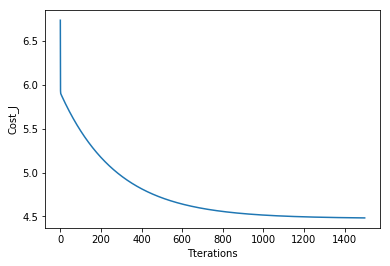

In [6]:
#画出每一次迭代和损失函数变化
theta, Cost_J = gradientDescent(X, y)
print('theta:',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Tterations')
plt.show()

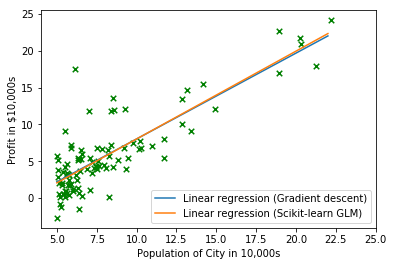

In [14]:
xx = np.arange(5,23)
yy = theta[0] + theta[1] * xx
plt.scatter(X[:,1], y, s = 30, c = 'g', marker = 'x', linewidths = '1')
plt.xlim(4,25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(xx, yy, label = 'Linear regression (Gradient descent)')
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx,regr.intercept_+regr.coef_*xx, label = 'Linear regression (Scikit-learn GLM)')
plt.legend(loc = 'lower right')
plt.show()

In [8]:
# 预测一下人口为35000和70000的城市的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]
